In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


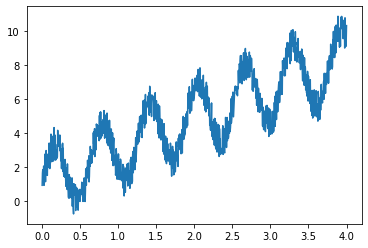

In [14]:
def f(x, A=10, a=2, W=0.2, w=10):
    return A*np.sin(W*x)+a*np.sin(w*x)

x = np.linspace(0, 4, 1000)
y = f(x) + np.random.rand(len(x))*2
plt.figure()
plt.plot(x, y)
plt.show()

In [16]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,0.000000,0.920027
1,0.004004,1.640555
2,0.008008,1.841952
3,0.012012,1.450593
4,0.016016,1.536842
...,...,...
995,3.983984,9.847888
996,3.987988,10.119393
997,3.991992,9.081843
998,3.995996,9.479892


In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(df[['x']], df['y'])

LinearRegression()

In [20]:
reg.coef_

array([1.780691])

In [21]:
reg.intercept_

1.3084866949386411

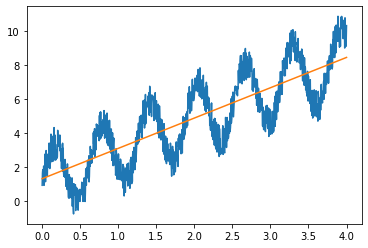

In [22]:
plt.figure()
plt.plot(x, y)
plt.plot(x, reg.coef_*x + reg.intercept_)
plt.show()

In [23]:
for i in range(15):
    df[f'sin{i}x'] = np.sin(i*x)
df

,x,y,sin0x,sin1x,sin2x,sin3x,sin4x,sin5x,sin6x,sin7x,sin8x,sin9x,sin10x,sin11x,sin12x,sin13x,sin14x
0,0.000000,0.920027,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004004,1.640555,0.0,0.004004,0.008008,0.012012,0.016015,0.020019,0.024022,0.028024,0.032027,0.036028,0.040029,0.044030,0.048030,0.052029,0.056027
2,0.008008,1.841952,0.0,0.008008,0.016015,0.024022,0.032027,0.040029,0.048030,0.056027,0.064020,0.072010,0.079995,0.087974,0.095948,0.103916,0.111877
3,0.012012,1.450593,0.0,0.012012,0.024022,0.036028,0.048030,0.060024,0.072010,0.083985,0.095948,0.107898,0.119831,0.131748,0.143646,0.155522,0.167377
4,0.016016,1.536842,0.0,0.016015,0.032027,0.048030,0.064020,0.079995,0.095948,0.111877,0.127778,0.143646,0.159476,0.175266,0.191011,0.206707,0.222350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.983984,9.847888,0.0,-0.746237,0.993511,-0.576484,-0.226003,0.877375,-0.942100,0.376899,0.440311,-0.963112,0.841938,-0.157811,-0.631835,0.999011,-0.698209
996,3.987988,10.119393,0.0,-0.748897,0.992568,-0.566627,-0.241575,0.886804,-0.933772,0.350793,0.468840,-0.972182,0.819664,-0.114180,-0.668333,0.999971,-0.657003
997,3.991992,9.081843,0.0,-0.751544,0.991562,-0.556689,-0.257085,0.895878,-0.924906,0.324412,0.496888,-0.979990,0.796077,-0.070327,-0.703289,0.998223,-0.613733
998,3.995996,9.479892,0.0,-0.754179,0.990492,-0.546670,-0.272529,0.904593,-0.915507,0.297776,0.524427,-0.986525,0.771213,-0.026338,-0.736622,0.993771,-0.568535


In [26]:
Y = df['y']
X = df.drop(columns=['y'])
reg = LinearRegression()
reg.fit(X, Y)
print(reg.coef_, reg.intercept_)

[ 1.79777056e+00  5.68989300e-16  6.50754949e-02 -3.81277248e-02
 -2.74232991e-02 -4.70446291e-02 -1.38008942e-02 -3.58391432e-03
  8.96321712e-03 -2.10170065e-02 -8.99905493e-02  1.94952775e+00
 -5.18946382e-02 -9.83287199e-04 -2.01592947e-02  2.31936361e-02] 1.180359429571785


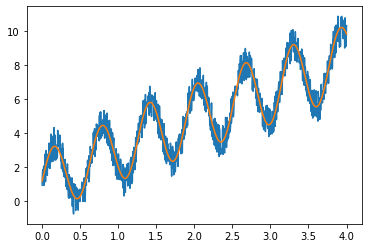

In [29]:
plt.figure()
plt.plot(x, y)
plt.plot(x, reg.predict(X))
plt.show()

<AxesSubplot:>

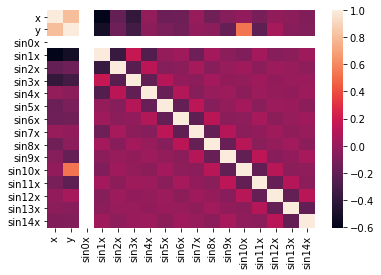

In [33]:
import seaborn as sns
sns.heatmap(df.corr())

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [35]:
X_train

,x,sin0x,sin1x,sin2x,sin3x,sin4x,sin5x,sin6x,sin7x,sin8x,sin9x,sin10x,sin11x,sin12x,sin13x,sin14x
991,3.967968,0.0,-0.735480,0.996644,-0.615064,-0.163176,0.836182,-0.969928,0.478160,0.321977,-0.914469,0.917212,-0.328438,-0.472148,0.968242,-0.839909
519,2.078078,0.0,0.874068,-0.849250,-0.048932,0.896792,-0.822397,-0.097746,0.917368,-0.793575,-0.146326,0.935746,-0.762850,-0.194556,0.951882,-0.730299
983,3.935936,0.0,-0.713404,0.999840,-0.687879,-0.035773,0.738015,-0.998560,0.661474,0.071500,-0.761681,0.996002,-0.634222,-0.107135,0.784373,-0.992169
449,1.797798,0.0,0.974346,-0.438566,-0.776941,0.788278,0.422126,-0.978283,0.018213,0.970085,-0.454862,-0.765345,0.799354,0.405545,-0.981896,0.036420
397,1.589590,0.0,0.999823,-0.037578,-0.998411,0.075102,0.995588,-0.112521,-0.991359,0.149780,0.985730,-0.186828,-0.978708,0.223612,0.970304,-0.260081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.997998,0.0,0.910129,-0.754179,-0.285177,0.990492,-0.535595,-0.546670,0.988594,-0.272529,-0.762762,0.904593,0.013170,-0.915507,0.745465,0.297776
309,1.237237,0.0,0.944883,0.618725,-0.539732,-0.972150,-0.096847,0.908733,0.691900,-0.455666,-0.990277,-0.192784,0.864039,0.758570,-0.367315,-0.999094
506,2.026026,0.0,0.898160,-0.789786,-0.203672,0.968882,-0.648302,-0.398806,0.998987,-0.479640,-0.577221,0.987213,-0.290872,-0.731438,0.934053,-0.089909
616,2.466466,0.0,0.624996,-0.975779,0.898445,-0.426923,-0.231908,0.788991,-0.999909,0.772123,-0.205573,-0.451171,0.909966,-0.969520,0.603703,0.026985


In [36]:
X_test

,x,sin0x,sin1x,sin2x,sin3x,sin4x,sin5x,sin6x,sin7x,sin8x,sin9x,sin10x,sin11x,sin12x,sin13x,sin14x
957,3.831832,0.0,-0.636722,0.981944,-0.877620,0.371511,0.304681,-0.841386,0.992894,-0.689843,0.070973,0.580389,-0.966042,0.909429,-0.436467,-0.236314
927,3.711712,0.0,-0.539732,0.908733,-0.990277,0.758570,-0.286908,-0.275511,0.750779,-0.988555,0.913625,-0.549691,0.011875,0.529697,-0.903712,0.991859
194,0.776777,0.0,0.700984,0.999851,0.725157,0.034479,-0.675978,-0.998662,-0.748467,-0.068916,0.650168,0.996286,0.770888,0.103272,-0.623585,-0.992725
408,1.633634,0.0,0.998026,-0.125344,-0.982284,0.248711,0.951048,-0.368155,-0.904811,0.481792,0.844302,-0.587829,-0.770475,0.684595,0.684495,-0.770562
220,0.880881,0.0,0.771300,0.981821,0.478504,-0.372713,-0.952946,-0.840335,-0.116752,0.691715,0.997267,0.577750,-0.261824,-0.911037,-0.897875,-0.231908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2.806807,0.0,0.328567,-0.620650,0.843817,-0.973288,0.994687,-0.905636,0.716025,-0.446908,0.128167,0.204806,-0.515038,0.768080,-0.935836,0.999678
945,3.783784,0.0,-0.598952,0.959263,-0.937376,0.542011,0.069307,-0.653012,0.976537,-0.910981,0.482464,0.138281,-0.703931,0.989114,-0.880205,0.420596
917,3.671672,0.0,-0.505602,0.872433,-0.999811,0.852775,-0.471682,-0.038872,0.538757,-0.890771,0.998300,-0.831829,0.437050,0.077685,-0.571097,0.907763
943,3.775776,0.0,-0.592520,0.954616,-0.945473,0.568647,0.029319,-0.615883,0.962937,-0.935517,0.544286,0.058612,-0.638717,0.970432,-0.924757,0.519456


In [37]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) # reg.coef_.T*x + reg.intercept_

In [38]:
y_pred

array([ 9.26031114,  6.74816493,  4.49433297,  2.99251521,  3.87684483,
       10.0474692 ,  2.30859969, 10.20192773,  1.41182114,  7.51837817,
        4.80561936,  5.36151455,  5.1976588 ,  4.58862216,  0.74216613,
        4.73119132,  2.65877707,  9.46467702,  3.52357341,  8.77657724,
        1.69511267,  5.43716191,  9.11394543,  0.68443088,  5.75837263,
        6.76908261,  2.77530325,  7.67670387,  4.52825931,  3.35559154,
        3.24889982,  6.9790335 ,  7.82105487,  5.59004346,  2.89069428,
        4.76942774,  5.97763532,  2.66052463,  4.61104758,  6.24575343,
        5.51933468,  2.39294967,  2.4323291 ,  2.62251499,  4.11188088,
        6.45134952,  5.56660954,  4.18193727,  8.09985486,  4.04539791,
        7.36902122,  2.8277496 ,  2.88672804,  2.78160592,  0.10916042,
        3.70081086,  7.42590361,  4.89347564,  4.45951683,  0.10260473,
        5.3219735 ,  1.30401811,  6.28661117,  3.89860049,  1.42961084,
        7.99934353,  1.89360977,  6.9005336 ,  6.70996418,  0.21

In [39]:
y_test

957    8.443261
927    6.319110
194    4.639932
408    2.193256
220    4.113369
         ...   
701    7.191924
945    8.273793
917    6.019656
943    8.533499
623    5.007007
Name: y, Length: 300, dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
print(mse(y_test, y_pred))
print(mae(y_test, y_pred))

0.3291521504425597
0.49414168926931534


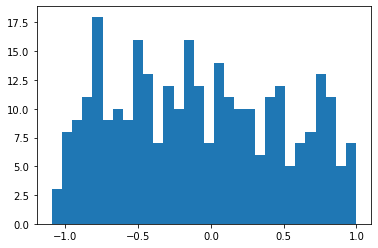

In [44]:
y_error = y_test-y_pred
plt.figure()
plt.hist(y_error, bins=30)
plt.show()